In [1]:
import pandas as pd
import numpy as np

In [2]:
data= ('/content/drive/MyDrive/Python/cinema_hall_ticket/cinema_hall_ticket_sales.csv')

In [3]:
df= pd.read_csv(data)

In [4]:
df.head()

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes


In [5]:
# checking the data types
df.dtypes

,0
Ticket_ID,object
Age,int64
Ticket_Price,float64
Movie_Genre,object
Seat_Type,object
Number_of_Person,object
Purchase_Again,object


In [6]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [7]:
print_categories(df)

Ticket_ID :  Categorical
Age :  Numerical
Ticket_Price :  Numerical
Movie_Genre :  Categorical
Seat_Type :  Categorical
Number_of_Person :  Categorical
Purchase_Again :  Categorical


In [8]:
length = len(df['Seat_Type'])
print(length)

1440


In [9]:
count = df['Seat_Type'].count()
print(count)

1440


In [10]:
null_values = df.isnull().sum()
print(null_values) #So there aren't null values

Ticket_ID           0
Age                 0
Ticket_Price        0
Movie_Genre         0
Seat_Type           0
Number_of_Person    0
Purchase_Again      0
dtype: int64


Finding the minimum and maximum of Ticket price and Age

In [11]:
# Minimum and maximum values for age
print("Minimum value: ", df["Age"].min())
print("Maximum value: ", df["Age"].max())

# Minimum and maximum values for ticket price
print("Minimum value: ", df["Ticket_Price"].min())
print("Maximum value: ", df["Ticket_Price"].max())

Minimum value:  18
Maximum value:  60
Minimum value:  10.01
Maximum value:  24.99


Mode for Age and Ticket Price

In [12]:
print(df["Age"].mode())
print(df["Ticket_Price"].mode())

0    38
Name: Age, dtype: int64
0    22.32
Name: Ticket_Price, dtype: float64


Mean of Age and Ticket Price

In [13]:
mean1 = df["Age"].mean()
print(mean1)
mean2 = df["Ticket_Price"].mean()
print(mean2)

38.90486111111111
17.38397222222222


Standard Deviation

In [14]:
sd1 = df["Age"].std()
print(sd1)
sd2 = df["Ticket_Price"].std()
print(sd2)

12.426293212803978
4.3970869660014875


Quantile Statistics

In [15]:
quantile1 = df["Age"].quantile([.25, .5, .75])
print(quantile1)
quantile2 = df["Ticket_Price"].quantile([.25, .5, .75])
print(quantile2)

0.25    28.0
0.50    39.0
0.75    50.0
Name: Age, dtype: float64
0.25    13.6400
0.50    17.2800
0.75    21.3925
Name: Ticket_Price, dtype: float64


Distribution Plot- Age

<ipython-input-16-037d4190729f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"].dropna());


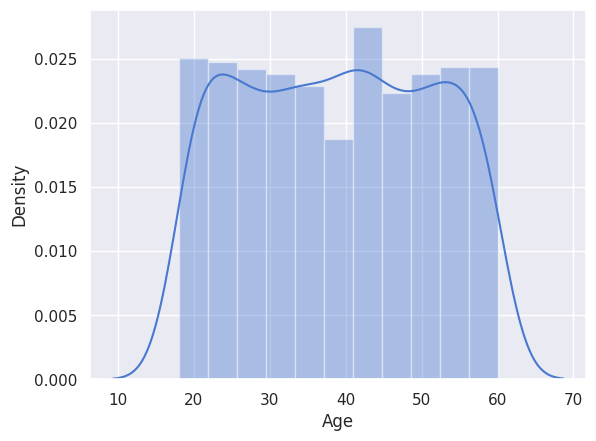

In [16]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df["Age"].dropna());

Distribution Plot- Ticket Price

<ipython-input-17-ecbeafb4ab85>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Ticket_Price"].dropna());


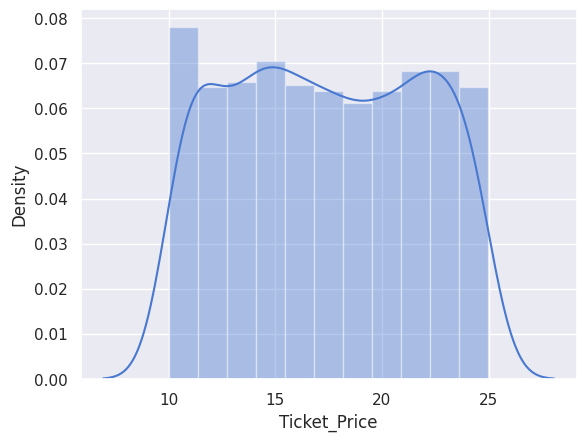

In [17]:
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df["Ticket_Price"].dropna());

Correlations

In [18]:
df[["Age", "Ticket_Price"]].corr()

,Age,Ticket_Price
Age,1.000000,0.036528
Ticket_Price,0.036528,1.000000


Non-numerical variables

In [19]:
df[["Movie_Genre", "Seat_Type", "Purchase_Again"]].describe()

,Movie_Genre,Seat_Type,Purchase_Again
count,1440,1440,1440
unique,5,3,2
top,Action,VIP,No
freq,310,494,733


Profiling

In [20]:
#pip install pandas-profiling

In [25]:
# Not working because of some issues
#from pandas_profiling import ProfileReport
# Create a profile report
#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [ ]:
#!pip install numba==0.56.4
#!pip install --upgrade pandas-profiling

In [23]:
# An alternative way to profile
#!pip install sweetviz
import sweetviz as sv

# Generate report
report = sv.analyze(df)
report.show_html('report.html')

print(report)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [26]:
from google.colab import files
files.download('/content/report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import os
os.getcwd()


'/content'